In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/processed/laps_valid.csv")

df.head()

,year,gp_name,session,circuit_id,driver,team,stint_number,compound_code,tyre_age_laps,lap_number,...,timestamp_utc_lap,temp_c,humidity_pct,precip_mm,wind_speed_ms,local_hour,weather_main,weather_time_delta_sec,matched_weather,track_status_clean
0,2022,Australian Grand Prix,FP1,albert_park,VER,Red Bull Racing,1.0,SOFT,2.0,2.0,...,2022-04-08 03:00:00+00:00,12.88,56.0,NaN,0.89,13,Clouds,0.0,True,Track clear
1,2022,Australian Grand Prix,FP1,albert_park,ALB,Williams,4.0,MEDIUM,18.0,24.0,...,2022-04-08 03:00:00+00:00,12.88,56.0,NaN,0.89,13,Clouds,0.0,True,Track clear
2,2022,Australian Grand Prix,FP1,albert_park,ZHO,Alfa Romeo,1.0,MEDIUM,3.0,3.0,...,2022-04-08 03:00:00+00:00,12.88,56.0,NaN,0.89,13,Clouds,0.0,True,Track clear
3,2022,Australian Grand Prix,FP1,albert_park,ZHO,Alfa Romeo,1.0,MEDIUM,4.0,4.0,...,2022-04-08 03:00:00+00:00,12.88,56.0,NaN,0.89,13,Clouds,0.0,True,Track clear
4,2022,Australian Grand Prix,FP1,albert_park,ZHO,Alfa Romeo,1.0,MEDIUM,6.0,6.0,...,2022-04-08 03:00:00+00:00,12.88,56.0,NaN,0.89,13,Clouds,0.0,True,Track clear


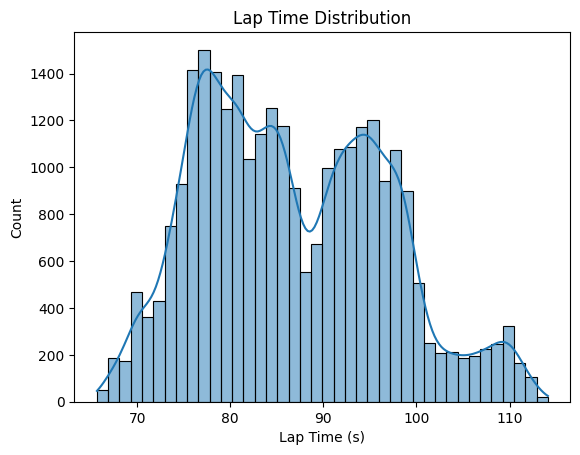

In [147]:
# Basic summary statistics
df.describe()

# Lap Times
# Histogram of lap times
sns.histplot(df["lap_time_s"], bins=40, kde=True)
plt.title("Lap Time Distribution")
plt.xlabel("Lap Time (s)")
plt.ylabel("Count")
plt.show()


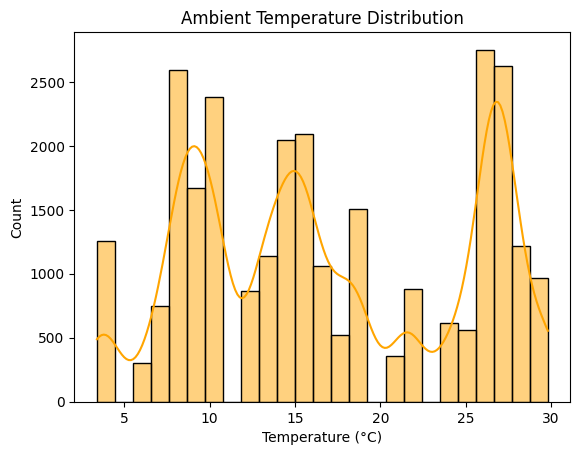

In [148]:
# Ambient Temperature
sns.histplot(df["temp_c"], bins=25, kde=True, color="orange")
plt.title("Ambient Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.show()

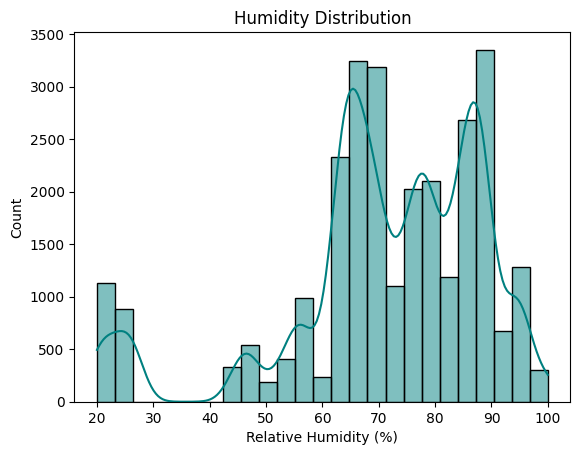

In [149]:
sns.histplot(df["humidity_pct"], bins=25, kde=True, color="teal")
plt.title("Humidity Distribution")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Count")
plt.show()

In [150]:
# Compute mean humidity per circuit
humidity_summary = (
    df.groupby("circuit_id")["humidity_pct"]
    .mean()
    .sort_values()
    .reset_index()
)
display(humidity_summary.head(10))  # shows the lowest-humidity tracks

,circuit_id,humidity_pct
0,las_vegas,21.610323
1,hermanos_rodriguez,24.557536
2,albert_park,49.461194
3,shanghai,51.000000
4,suzuka,56.747381
5,lusail,60.930649
6,cota,61.394161
7,yas_marina,64.519892
8,sakhir,64.646300
9,catalunya,67.324239


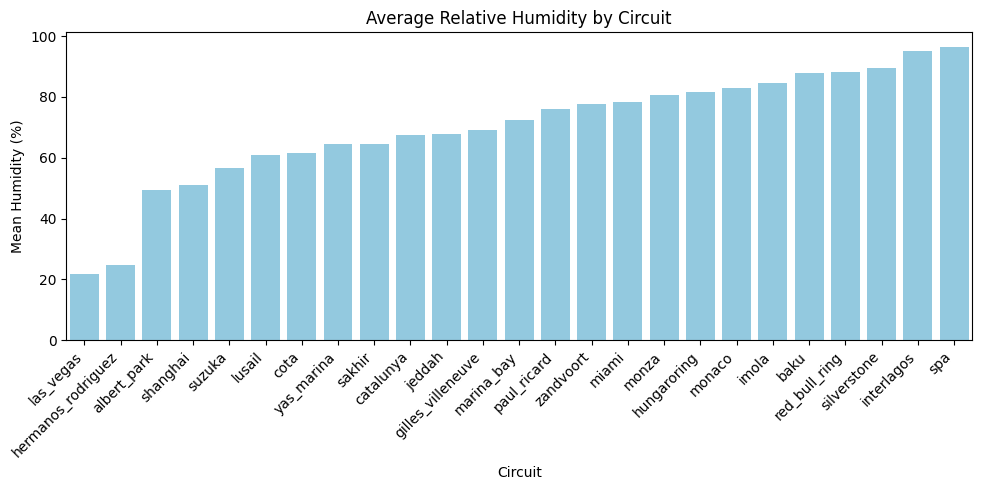

In [151]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=humidity_summary,
    x="circuit_id",
    y="humidity_pct",
    color="skyblue"
)
plt.xticks(rotation=45, ha="right")
plt.title("Average Relative Humidity by Circuit")
plt.xlabel("Circuit")
plt.ylabel("Mean Humidity (%)")
plt.tight_layout()
plt.show()

In [152]:
# Check if Austria (Red Bull Ring) exists in your dataset at all
df[df["circuit_id"] == "red_bull_ring"][["humidity_pct"]].describe()

,humidity_pct
count,1259.000000
mean,88.198570
std,0.399082
min,88.000000
25%,88.000000
50%,88.000000
75%,88.000000
max,89.000000


In [153]:
humidity_summary = (
    df.groupby("circuit_id", dropna=False)["humidity_pct"]
    .mean()
    .reindex(sorted(df["circuit_id"].unique()))
    .reset_index()
)
df["precip_mm"] = df["precip_mm"].fillna(0)

In [158]:
df_austria = df[
    (df["circuit_id"] == "red_bull_ring") &
    (df["year"] == 2022) &
    (df["session"] == "FP1")
]
print(df_austria["timestamp_utc_lap"].min(), "→", df_austria["timestamp_utc_lap"].max())



2022-07-08 11:30:00+00:00 → 2022-07-08 11:30:00+00:00


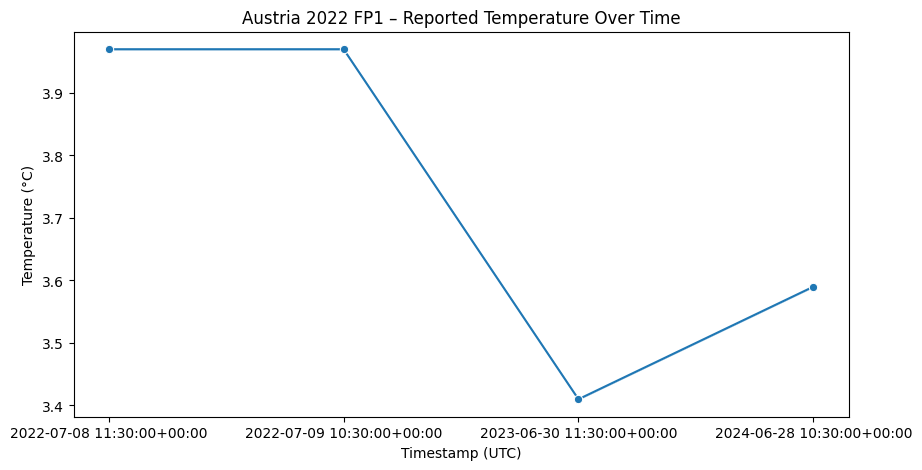

In [156]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df_austria, x="timestamp_utc_lap", y="temp_c", marker="o")
plt.title("Austria 2022 FP1 – Reported Temperature Over Time")
plt.xlabel("Timestamp (UTC)")
plt.ylabel("Temperature (°C)")
plt.show()


In [161]:
weather_check = (
    df.groupby(["year", "circuit_id"])
    .agg(
        weather_unique_timestamps=("timestamp_utc_lap", "nunique"),
        temp_min=("temp_c", "min"),
        temp_max=("temp_c", "max"),
        temp_mean=("temp_c", "mean")
    )
    .reset_index()
    .sort_values("weather_unique_timestamps")
)

weather_check.head(100)


,year,circuit_id,weather_unique_timestamps,temp_min,temp_max,temp_mean
7,2022,imola,1,14.03,14.03,14.030000
26,2023,gilles_villeneuve,1,9.01,9.01,9.010000
23,2023,baku,1,18.97,18.97,18.970000
29,2023,interlagos,1,17.79,17.79,17.790000
25,2023,cota,1,23.96,23.96,23.960000
19,2022,suzuka,1,16.84,16.84,16.840000
37,2023,red_bull_ring,1,3.41,3.41,3.410000
32,2023,lusail,1,26.96,26.96,26.960000
51,2024,interlagos,1,18.00,18.00,18.000000
54,2024,lusail,1,26.97,26.97,26.970000
